# 第二章第二节课堂代码复现

In [17]:
#初始字符串，各个城市经纬度信息

coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'泗阳', geoCoord:[118.70, 33.70]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

# Get data from source using regular expression
使用有规律的表达式获取数据
# regular expression

In [18]:
#导入正则表达式库，进行全搜索

import re
l="color or colour"
pattern = re.compile("colou?r")   #？号前面的u可有可无
pattern.findall(l)

['color', 'colour']

In [19]:
#获取每个城市经纬度信息并返回

def get_city_info(city_coordination):
    city_location={}
    for line in city_coordination.split("\n"):#将每行划分为各个line
        if line.startswith("//"):continue   #以//开头的line退出循环
        if line.strip()=="":continue    # 空行也退出循环       
        city = re.findall("name:'(\w+)'",line)[0] #w+表示1个或多个任意非空字符,在每行中找出城市名name,赋值给city
        x_y=re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]     #s表示空 ，d表示数字,输出每行的Coord后面经纬度组成的列表
        #print(x_y)
        x_y=tuple(map(float,x_y))#将经纬度组成列表集合中的每个值,用float函数把它们转成float型,并返回迭代器
        city_location[city]=x_y
    return city_location
city_info=get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '泗阳': (118.7, 33.7),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

# Compute distance between cities

In [20]:
#通过经纬度计算两地间直线距离

import math
def geo_distance(origin,destination):     #起点，目的地
    """
    Calculate the Haversine distance.
    
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)
    
    Returns
    -------
    distance_in_km : float
    
    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination =(52.5186, 13.4083)  #Berlin
    >>> round(distance(oringin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371                       #km 
    
    dlat = math.radians(lat2 - lat1)#角度转化为弧度   180°=π弧度
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))   ###########################不懂
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))  
    d = radius * c  
    return d

In [21]:
#输入城市关联出经纬度求距离函数

def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance("泗阳","上海")

338.57312338992375

# Draw the graph   绘图


In [23]:
#生成所有城市名称组成的列表

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['font.sans-serif'] = ['SimHei']#设置字体为中文
plt.rcParams['axes.unicode_minus'] = False  #设置字符正常显示
city_info.keys()  #生出所有城市集合
print(list(city_info.keys()))

['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '泗阳', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门']


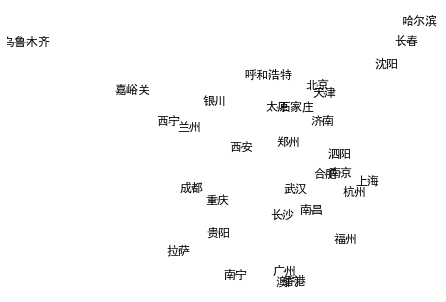

In [24]:
#生成城市名称  散点图

import networkx as nx
city_graph = nx.Graph()#创建一个空无向图
city_graph.add_nodes_from(list(city_info.keys()))#加入点的列表
nx.draw(city_graph,city_info,with_labels=True,node_size=1)#无向图中加载城市点

# Build connection between.Let's assume that two cities are connected if their distance is less than 700 km.

In [26]:
#返回所有城市所有小于700km的路线

from collections import defaultdict#当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值
threshold = 700  # 定义限制值

def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue 
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)# c1对应c2组成列表
    return cities_connection
cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '泗阳',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '泗阳',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
    

# Draw connection graph 

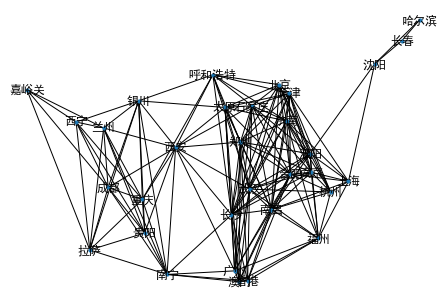

In [33]:
#用draw(无向图,网络布局,keywords)表示 城市连接

cities_connection_graph = nx.Graph(cities_connection)#依据每个城市与距离小于700的城市为基础创建一个无向网络图
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)
#以city_info为图像布局，节点为关键字
#with_labels`: 节点是否带标签（默认为True）,False则不显示城市名
#node_size为节点大小尺寸，默认300

# BFS 1 version

In [48]:
#采用广度优先搜索法求两地间连接路线

def search_1(graph,start,destination):
    pathes = [[start]] #存储搜索路径
    visited = set()  #存储已搜索访问的节点
    
    while pathes:#遍历所有pathes可能
        path = pathes.pop(0)# 切取第一条路径
        #print("path:%s"%path)
        froniter = path[-1] #提取即将探索的节点
        #print("froniter:%s"%froniter)
        
        if froniter in visited: continue  #检查此节点如果已经访问过，则不用再次探索,退出循环
        successors = graph[froniter]#返回所有目的地列表
        print("successors:%s"%successors)
        
        for city in successors:  #去除所有目的地城市
            if city in path: continue #检查是否会形成环
            new_path = path + [city]   #生成每一种【出发地，可能目的地】
            #print("new_path%s"%new_path)
            pathes.append(new_path) #将每一种【出发地，可能目的地】新路径加入pathes列表中，形成嵌套列表
            #print("pathes:%s"%pathes)
            if city==destination:#如果可能目的地等于预设目的地
                return new_path    #函数中使用return来终止函数的执行
        visited.add(froniter)
        #print("visited:%s"%visited)
        
search_1(cities_connection,"北京","上海")

successors:['石家庄', '武汉', '郑州', '济南', '南京', '泗阳', '合肥', '杭州', '南昌', '长沙', '太原', '天津', '呼和浩特']
successors:['武汉', '郑州', '济南', '南京', '泗阳', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特']
successors:['石家庄', '郑州', '济南', '南京', '泗阳', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门']
successors:['石家庄', '武汉', '济南', '南京', '泗阳', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门']
successors:['石家庄', '武汉', '郑州', '南京', '泗阳', '合肥', '杭州', '南昌', '福州', '长沙', '太原', '北京', '上海', '天津', '呼和浩特']


['北京', '济南', '上海']

# Optimal search using variation of BFS
最优搜索

In [51]:
#采用某种规则获取最优路径

def search_2(graph,start,destination,search_strategy):
    pathes =[[start]]
    visited = set()
   
    while pathes:
        path = pathes.pop(0)#截取pathes第一个元素
        froniter = path[-1] #获取path中最后一个元素
        if froniter in visited : continue  #break跳出当前循环，continue终止本轮循环
        if froniter == destination:
            return path  #如果path中最后一个城市等于目的地，则返回path，退出函数
        successsors = graph[froniter]#返回froniter城市键在graph中对应的列表键值
        for city in successsors:
            if city in path: continue # 如果可能目的城市等于开始城市，退出函数
            new_path = path+[city]#开始城市加上可能的目的城市组成新列表
            pathes.append(new_path)#所有新列表组成大的嵌套列表
        pathes = search_strategy(pathes)#search_strategy可能是某种函数、规则
        #print(pathes)
        visited.add(froniter)
        
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x) #    lambda x:x按原值返回 即pathes

['北京', '济南', '上海']

In [52]:
#获取多个城市间距离

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        #print(i,_)#返回索引号加城市名的集合，不显示path中最后一个城市
        distance += get_city_distance(path[i],path[i+1])#调用计算两个城市间距离函数
    return distance #返回第一个城市到第二个城市+第二个城市到第三个城市+。。。+倒数第二个城市到目的地的距离

get_distance_of_path(["南京","泗阳","香港"])

844.3613756686925

In [53]:
#将各种可能路径进行距离排序

def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)#将

search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)
#将北京到上海的各种可能路线按照get_distance_of_path()函数中返回的距离进行排序

['北京', '天津', '上海']

# Machine Learning

In [86]:
#返回数据库信息的矩阵行和列

from sklearn.datasets import load_boston #sklearn.datasets库自带数据集：波士顿房价数据库
import random
dataset = load_boston()#dataset是一个含有data、target键的字典
#print(dataset)
x,y=dataset["data"],dataset['target']
#print(y)
print(x.shape)#返回x的行数(嵌套列表中子列表个数)和列数(每个字列表中元素个数)
print(y.shape)#如果不是嵌套列表则只有行(元素个数)没有列
print(x[1])
print(x[1].shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [80]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [81]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [91]:

X_rm =x[:,5]#取x的前5行
print(x)
print(X_rm.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506,)


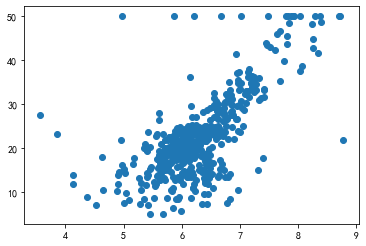

In [38]:
plt.scatter(X_rm,y)#绘画浮点图,共有506*13个点

# Gradient descent  梯度下降   
# 未能理解


### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [45]:
#定义函数

def price(rm, k, b):
    return k * rm + b

# Define mean square loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [46]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

# Define partial derivatives
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [47]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [48]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 3346.0063053396207, parameters k is -19.855447691861187 and b is 93.56518859456787
Iteration 1, the loss is 2859.4048837080486, parameters k is -19.151291779613384 and b is 93.67269228870802
Iteration 2, the loss is 2449.292064002559, parameters k is -18.504804548877605 and b is 93.77113025053956
Iteration 3, the loss is 2103.6444004841533, parameters k is -17.911259786779485 and b is 93.8612454646849
Iteration 4, the loss is 1812.3284446775103, parameters k is -17.366318615339583 and b is 93.94372002475733
Iteration 5, the loss is 1566.803651697989, parameters k is -16.865997747596243 and b is 94.01918012365937
Iteration 6, the loss is 1359.8719875195163, parameters k is -16.406640345285265 and b is 94.08820063490336
Iteration 7, the loss is 1185.4668961389373, parameters k is -15.984889264866846 and b is 94.15130931847156
Iteration 8, the loss is 1038.4754395503433, parameters k is -15.597662496163718 and b is 94.20899068198682
Iteration 9, the loss is 914.58

Iteration 130, the loss is 249.20637660159096, parameters k is -11.205943241806063 and b is 94.5104636803421
Iteration 131, the loss is 249.19648811329154, parameters k is -11.205444428321673 and b is 94.50735887810997
Iteration 132, the loss is 249.1866001174778, parameters k is -11.204946484172218 and b is 94.50425401576155
Iteration 133, the loss is 249.17671261146833, parameters k is -11.204449339073847 and b is 94.50114910434398
Iteration 134, the loss is 249.16682559299852, parameters k is -11.203952928502769 and b is 94.49804415399888
Iteration 135, the loss is 249.15693906015736, parameters k is -11.203457193223194 and b is 94.49493917403657
Iteration 136, the loss is 249.14705301133, parameters k is -11.202962078853954 and b is 94.49183417300424
Iteration 137, the loss is 249.13716744515247, parameters k is -11.202467535470642 and b is 94.48872915874837
Iteration 138, the loss is 249.1272823604702, parameters k is -11.201973517240367 and b is 94.48562413847232
Iteration 139, t

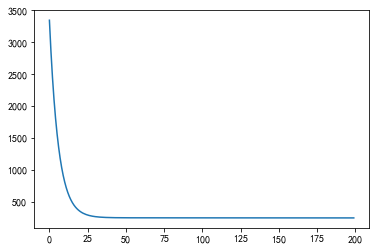

In [49]:
plt.plot(list(range(iteration_num)),losses)

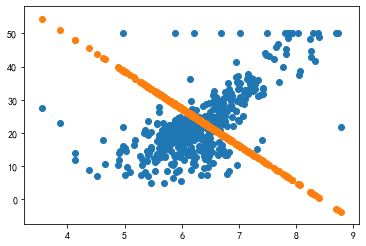

In [50]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)